In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
log_path = Path("/home/kafka/repos/thesis/logs_dgx")

BATCH_SIZE = 128
DATASET = "cifar10"
MACHINE="DGX"

model_name = f"resnet18_bs_{BATCH_SIZE}"

model_path_prefix = "resnet18_pretrained_pid"

# Single training
train_path = log_path / "single_runs" / DATASET

# Shared data training
train_mul_path = log_path / "queues" / DATASET / model_name

naive_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_12tw_1vw_pid"
shared_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_12tw_1vw_1pf_pid"

if DATASET == "compcars":
    # CompCars, BS 128
    pids = [
          3343954, 3346647, 3350512, 3355774, # Naive
          # MPS
          3382485, 3384915, 3387893, 3391520, # Shared
          # Shared + MPS
          3362449, 3363317, 3364353, 3365758, # Naive DALI
          3397495, 3398302, 3399467, 3400815 # Shared DALI
    ]

    trace_pids = [
          3343954, 3346647, 3350512, 3355774, # Naive
          # MPS
          3382362, 3384843, 3387802, 3391399, # Shared
          # Shared + MPS
          3362449, 3363317, 3364353, 3365758, # Naive DALI
          3397451, 3398240, 3399391, 3400726, # Shared DALI
    ]
if DATASET == "imagenet_10pct":
      pids = [
            915737, 919495, 926109, 935866, #948533, 963989, 981972, # Naive
            3686718, 3690486, 3696350, 3705174, # MPS
            1002965, 1006259, 1011751, 1019405, # Shared
            3716109, 3719552, 3724278, 3730341, # Shared + MPS
            3644883, 3648356, 3652456, 3657996, # Naive DALI
            3666264, 3668423, 3672242, 3677330, # Shared DALI
      ]

      trace_pids = [
            915737, 919495, 926109, 935866, #948533, 963989, 981972, # Naive
            3686718, 3690486, 3696350, 3705174, # MPS
            1002900, 1006194, 1011675, 1019251, # Shared
            3715967, 3719418, 3724145, 3730224, # Shared + MPS
            3644883, 3648356, 3652456, 3657996, # Naive DALI
            3666214, 3666214, 3668367, 3672188, # Shared DALI
      ]
if DATASET == "cifar10" and BATCH_SIZE == 128:
      pids = [
            2865667, 2868128, 2871753, 2876257, 2882164, 2889160, 2897317, 2906726, # Naive
            3135012, 3137702, 3141364, 3145897, 3151423, 3157948, 3165695, 3174500, # MPS
            2917286, 2919583, 2921885, 2924412, 2927405, 2930530, 2934145, 2938000, # Shared
            3184515, 3186744, 3189078, 3191568, 3193935, 3196523, 3199396, 3202478, # Shared MPS
            3760750, 3762201, 3763566, 3765318, 3767054, 3768854, 3771040, 3773281, # Naive DALI
            3775871, 3776918, 3778157, 3779204, 3780350, 3781610, 3783317, 3785014, # Shared DALI
      ]
      trace_pids = [
            2865667, 2868128, 2871753, 2876257, 2882164, 2889160, 2897317, 2906726, # Naive
            3135012, 3137702, 3141364, 3145897, 3151423, 3157948, 3165695, 3174500, # MPS
            2917138, 2919512, 2921679, 2924286, 2927279, 2930369, 2934024, 2937923, # Shared
            3184397, 3186595, 3188907, 3191417, 3193846, 3196334, 3199270, 3202141, # Shared MPS
            3760750, 3762201, 3763566, 3765318, 3767054, 3768854, 3771040, 3773281, # Naive DALI
            3775765, 3776807, 3777985, 3779157, 3780294, 3781557, 3783198, 3784938, # Shared DALI
      ]
if DATASET == "cifar10" and BATCH_SIZE == 256:
      pids = [
            2955138, 2957381, 2960554, 2964955, 2970312, 2976847, 2984549, 2993251, # Naive
            3066512, 3068817, 3071980, 3076246, 3081523, 3087954, 3095364, 3104067, # MPS
            3003209, 3005043, 3007140, 3009463, 3011919, 3014573, 3017337, 3020470, # Shared
            3113907, 3115827, 3117849, 3120072, 3122237, 3124544, 3127020, 3129941, # Shared MPS
            3798625, 3799516, 3800553, 3801786, 3803011, 3804447, 3806138, 3807908, # Naive DALI
            3809922, 3810825, 3811559, 3812448, 3813473, 3814502, 3815849, 3817192, # Shared DALI
      ]
      trace_pids = [
            2955138, 2957381, 2960554, 2964955, 2970312, 2976847, 2984549, 2993251, # Naive
            3066512, 3068817, 3071980, 3076246, 3081523, 3087954, 3095364, 3104067, # MPS
            3003073, 3004984, 3007052, 3009357, 3011781, 3014454, 3017217, 3020266, # Shared
            3113741, 3115743, 3117722, 3119914, 3122089, 3124386, 3126870, 3129630, # Shared MPS
            3798625, 3799516, 3800553, 3801786, 3803011, 3804447, 3806138, 3807908, # Naive DALI
            3809851, 3810728, 3811508, 3812392, 3813332, 3814446, 3815802, 3817093, # Shared DALI
      ]

In [3]:
# BASELINE
if DATASET == "cifar10":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18", "5x RN18", "6x RN18", "7x RN18", "8x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(0, 8)]
    naive = [df.iloc[2:]["total_time"].mean() for df in naive]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(8, 16)]
    mps = [df.iloc[2:]["total_time"].mean() for df in mps]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(16, 24)]
    shared = [df.iloc[2:]["total_time"].mean() for df in shared]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(24, 32)]
    shared_mps = [df.iloc[2:]["total_time"].mean() for df in shared_mps]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(32, 40)]
    naive_dali = [df.iloc[2:]["total_time"].mean() for df in naive_dali]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(40, 48)]
    shared_dali = [df.iloc[2:]["total_time"].mean() for df in shared_dali]
    
if DATASET == "imagenet_10pct":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(0, 4)]
    naive = [df.iloc[2:]["total_time"].mean() for df in naive]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(4, 8)]
    mps = [df.iloc[2:]["total_time"].mean() for df in mps]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(8, 12)]
    shared = [df.iloc[2:]["total_time"].mean() for df in shared]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(12, 16)]
    shared_mps = [df.iloc[2:]["total_time"].mean() for df in shared_mps]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(16, 20)]
    naive_dali = [df.iloc[2:]["total_time"].mean() for df in naive_dali]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(20, 24)]
    shared_dali = [df.iloc[2:]["total_time"].mean() for df in shared_dali]
    

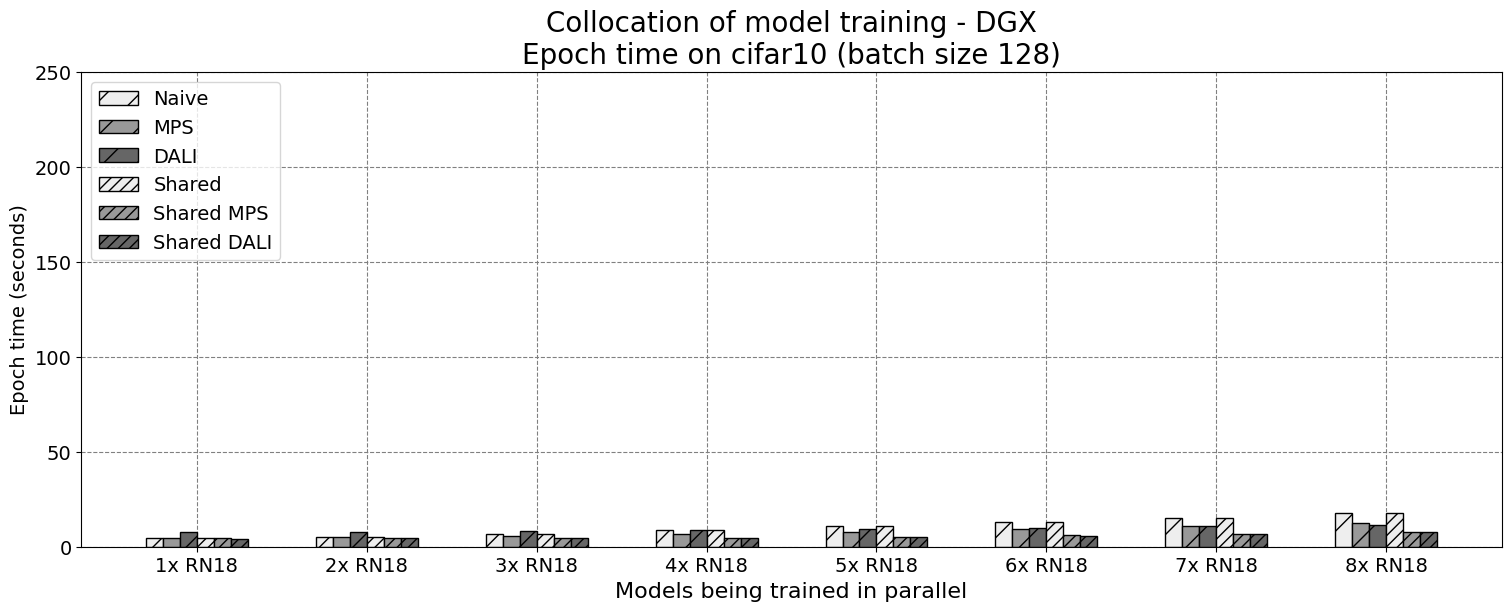

In [4]:
import matplotlib.pyplot as plt
import numpy as np


measurements ={
    "Naive": naive,
    "MPS": mps,
    "DALI": naive_dali,
    "Shared": shared,
    "Shared MPS": shared_mps,
    "Shared DALI": shared_dali,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,6))
hatches = ["/", "/", "/", "///", "///", "///"]
hatch_cols = ["#eeeeee", "#999999", "#666666", 
              "#eeeeee", "#999999", "#666666"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black", yerr=measurements_err[attribute][idx], ecolor="red", capsize=5)
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    #ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Epoch time (seconds)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nEpoch time on {DATASET} (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 251, 50)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [5]:
def get_mem(dfs):
    mems = []
    for df in dfs:
        df["mem"] = df.apply(lambda x: x[" used_gpu_memory [MiB]"].strip(" MiB"), axis=1).astype(int)
        mem = df.groupby([" pid"]).max()["mem"].sum()
        mems.append(mem)
    return mems

In [6]:
if DATASET == "cifar10":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18", "5x RN18", "6x RN18", "7x RN18", "8x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(0, 8)]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(8, 16)]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(16, 24)]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(24, 32)]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(32, 40)]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(40, 48)]
    
if DATASET == "imagenet_10pct":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(0, 4)]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(4, 8)]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(8, 12)]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(12, 16)]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(16, 20)]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(20, 24)]

naive_mem = get_mem(naive)
mps_mem = get_mem(mps)
shared_mem = get_mem(shared)
shared_mps_mem = get_mem(shared_mps)
naive_dali_mem = get_mem(naive_dali)
shared_dali_mem = get_mem(shared_dali)


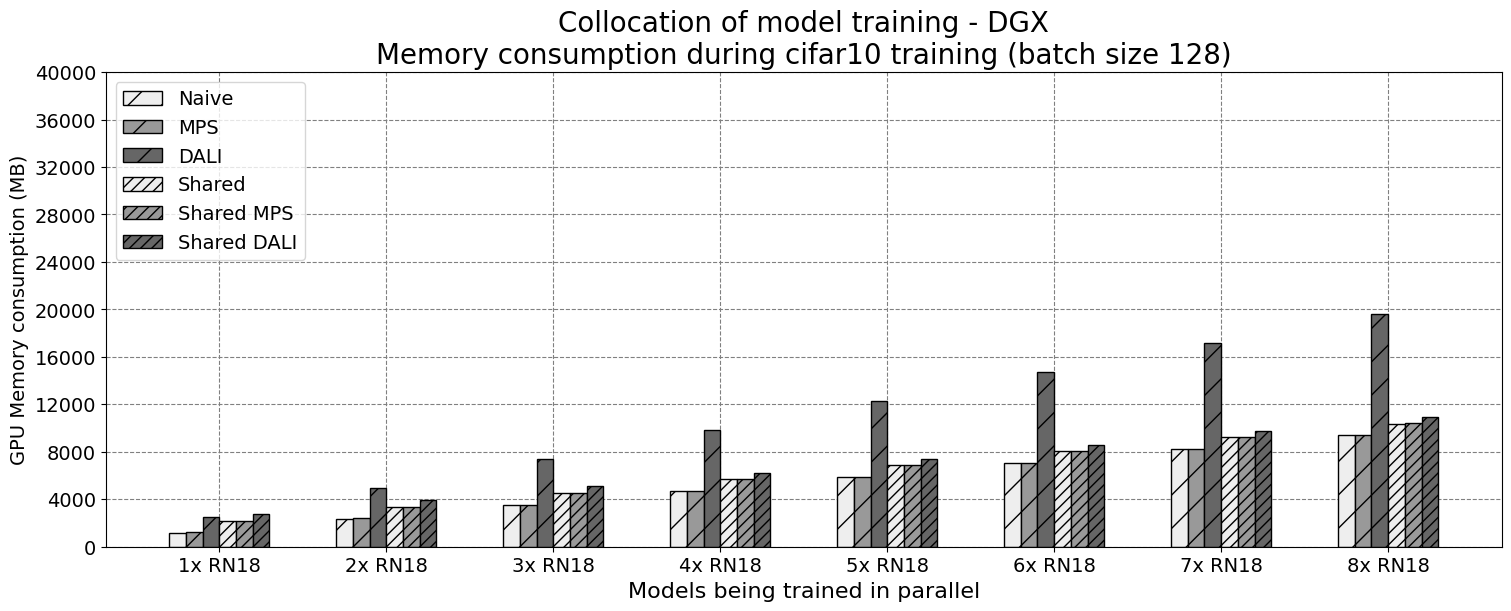

In [7]:
import matplotlib.pyplot as plt
import numpy as np

measurements ={
    "Naive": naive_mem,
    "MPS": mps_mem,
    "DALI": naive_dali_mem,
    "Shared": shared_mem,
    "Shared MPS": shared_mps_mem,
    "Shared DALI": shared_dali_mem,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,6))
hatches = ["/", "/", "/", "///", "///", "///"]
hatch_cols = ["#eeeeee", "#999999", "#666666", 
              "#eeeeee", "#999999", "#666666"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    #ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('GPU Memory consumption (MB)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nMemory consumption during {DATASET} training (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 40960, 4000)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [8]:
cols = ["time", "cpu", "%usr", "%nice", "%sys", "%iowait", "%irq", "%soft", "%steal", "%guest", "%gnice", "%idle"]

def create_plottable_df(path, log_path):
    df_log = pd.read_csv(log_path)
    last_time = (pd.to_datetime(df_log['timestamp'], unit="s", utc=True).dt.tz_convert('Europe/Berlin')).iloc[-1].to_datetime64()

    with open(path) as f:
        lines = f.readlines()
        lines = [l for l in lines if l != "\n"]
        lines = [l.strip() for l in lines if not "CPU" in l]
        lines = [l.split() for l in lines]

    new_lines = []

    for line in lines:
        new_line = []
        for idx, l in enumerate(line):
            if idx == 0:
                new_line.append(l)
            else:
                new_line.append(float(l))
        new_lines.append(new_line)
    df = pd.DataFrame(new_lines, columns=cols)
    df = df[pd.to_datetime(df['time'], unit='ns') < last_time]
    df['running_seconds'] = pd.to_datetime(df['time'], unit='ns')

    first_timestamp = df['running_seconds'].iloc[0]
    df['running_seconds'] = (df['running_seconds'] - first_timestamp).dt.total_seconds()
    df['running_seconds_normalized'] = (df['running_seconds'] - df['running_seconds'].min()) / (df['running_seconds'].max() - df['running_seconds'].min()) * 99 + 1
    
    return df

In [9]:
def plot_dfs(dfs, title, titles, metric, normalized=True):
    fig, ax = plt.subplots(figsize=(12,8))
    if normalized:
        group = 'running_seconds_normalized'
    else:
        group = 'running_seconds'
    for idx, df in enumerate(dfs):
        average_all_cpus = df.groupby(group)[metric].mean()

        plt.plot(average_all_cpus.index, average_all_cpus.values, \
                    linewidth=1, label=titles[idx])
    if normalized:
        plt.xlabel('Running time, normalized %')
    else:
        plt.xlabel('Running time (seconds)')
    if metric in ["%usr", "%nice"]:
        plt.ylabel('% CPU Utilization')
        plt.title(f'{title}\nCPU Usage')
    if metric == "%iowait":
        plt.ylabel('% I/O wait')
        plt.title(f'{title}\nI/O wait')
    plt.legend()
    plt.grid(True)
    plt.ylim(0,100)
    plt.show()

In [10]:
def create_plottable_df(path, log_path):
    with open(path) as f:
        lines = f.readlines()
        lines = [l for l in lines if l != "\n"]
        lines = [l.strip() for l in lines if not "CPU" in l]
        lines = [l.split() for l in lines]
    df_log = pd.read_csv(log_path)
    last_time = (pd.to_datetime(df_log['timestamp'], unit="s", utc=True).dt.tz_convert('Europe/Berlin')).iloc[-1].to_datetime64()
    date = (pd.to_datetime(df_log['timestamp'], unit="s", utc=True).dt.tz_convert('Europe/Berlin')).iloc[-1].date().strftime("%Y-%m-%d ")
    new_lines = []

    for line in lines:
        new_line = []
        for idx, l in enumerate(line):
            if idx == 0:
                new_line.append(l)
            else:
                new_line.append(float(l))
        new_lines.append(new_line)
    df = pd.DataFrame(new_lines, columns=cols)
    df['time'] = date + df['time']
    df['running_seconds'] = pd.to_datetime(df['time']) - pd.DateOffset(hours=2)
    df = df[pd.to_datetime(df['running_seconds']) < last_time]

    first_timestamp = df['running_seconds'].iloc[0]
    df['running_seconds'] = (df['running_seconds'] - first_timestamp).dt.total_seconds()
    df['running_seconds_normalized'] = (df['running_seconds'] - df['running_seconds'].min()) / (df['running_seconds'].max() - df['running_seconds'].min()) * 99 + 1
    
    return df

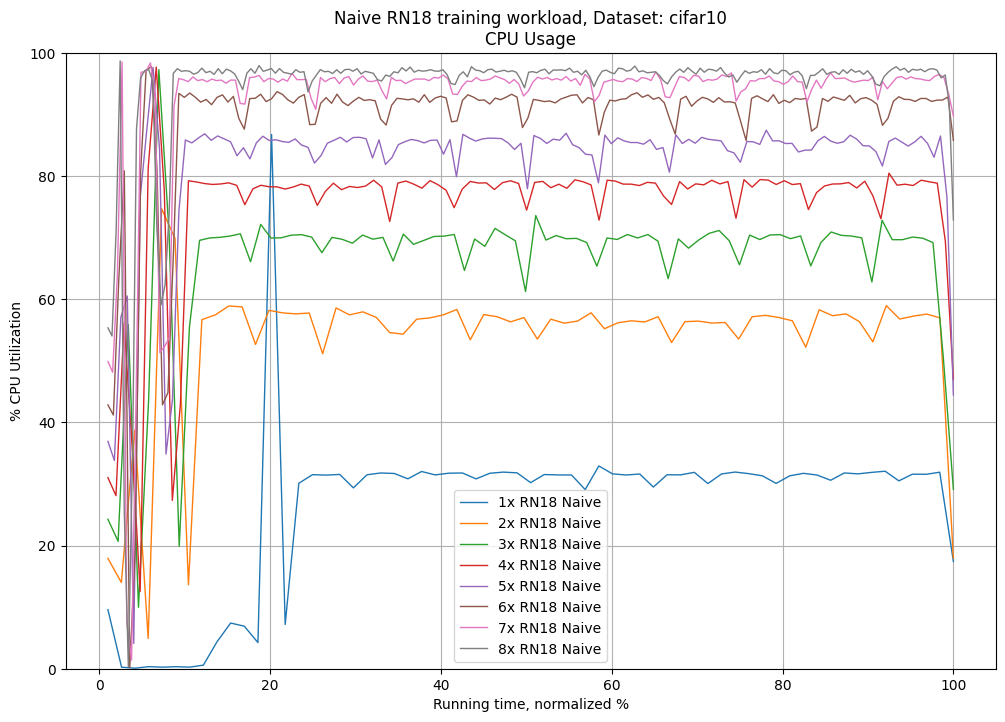

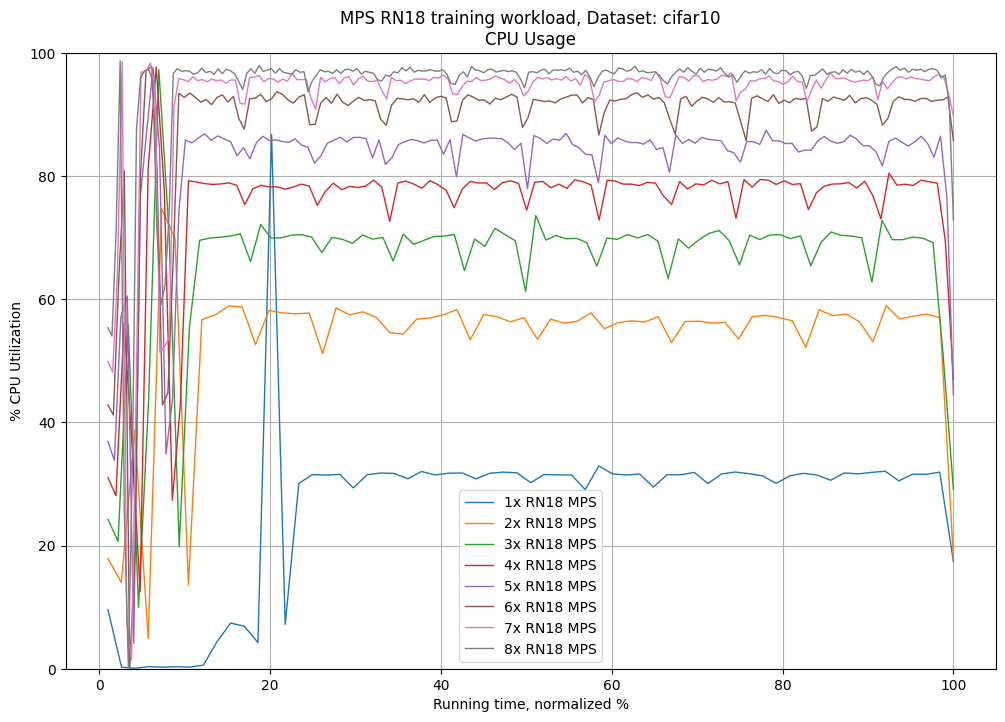

In [11]:
naive = [train_path / model_name / f"pid_{trace_pids[i]}_cpu.out" for i in range(0, 8)]
naive_logs = [train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv" for i in range(0, 8)]

naive_suptitles = [f"{i}x RN18 Naive" for i in range(1,9)]

title = f"Naive RN18 training workload, Dataset: {DATASET}"

dfs = [create_plottable_df(path, naive_logs[idx]) for idx, path in enumerate(naive)]

plot_dfs(dfs, title, naive_suptitles, "%usr", True)


mps = [train_path / model_name / f"pid_{trace_pids[i]}_cpu.out" for i in range(8, 16)]
mps_logs = [train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv" for i in range(8, 16)]

naive_suptitles = [f"{i}x RN18 MPS" for i in range(1,9)]

title = f"MPS RN18 training workload, Dataset: {DATASET}"

dfs = [create_plottable_df(path, naive_logs[idx]) for idx, path in enumerate(naive)]

plot_dfs(dfs, title, naive_suptitles, "%usr", True)

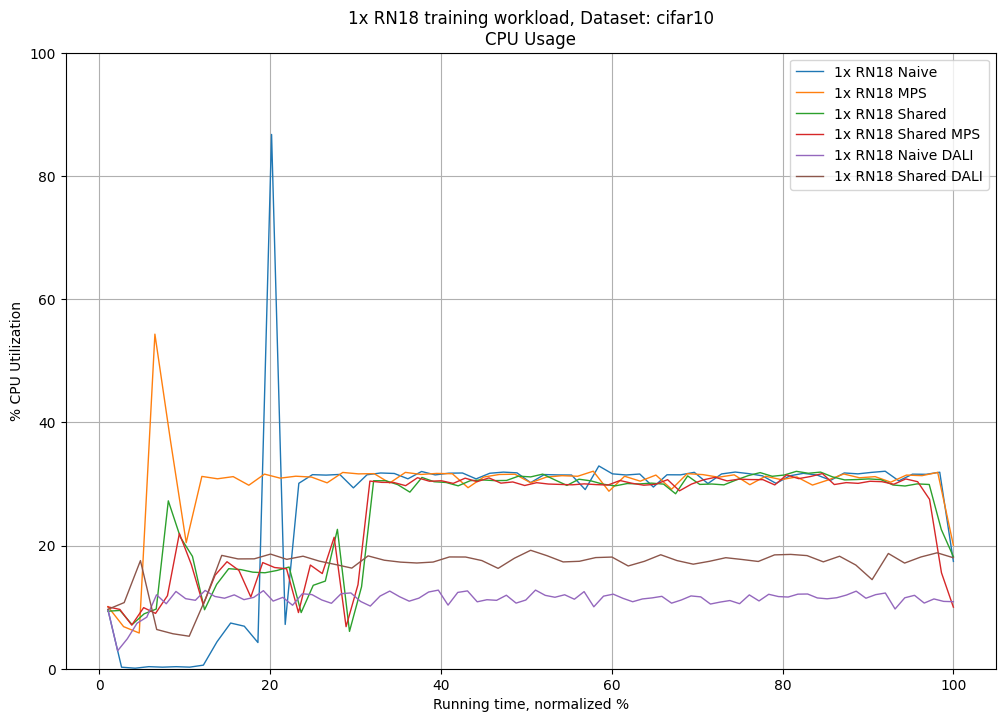

In [12]:
idx = [i for i in range(0,41,8)]

paths = [
    train_path / model_name / f"pid_{trace_pids[idx[0]]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[idx[1]]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[idx[2]]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[idx[3]]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[idx[4]]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[idx[5]]}_cpu.out"
]

logs = [
    train_path / model_name / f"{naive_model_path_prefix}_{pids[idx[0]]}.csv",
    train_path / model_name / f"{naive_model_path_prefix}_{pids[idx[1]]}.csv",
    train_mul_path / f"{shared_model_path_prefix}_{pids[idx[2]]}.csv",
    train_mul_path / f"{shared_model_path_prefix}_{pids[idx[3]]}.csv",
    train_path / model_name / f"{naive_model_path_prefix}_{pids[idx[4]]}.csv",
    train_mul_path / f"{shared_model_path_prefix}_{pids[idx[5]]}.csv",
]

suptitles = [
    "1x RN18 Naive",
    "1x RN18 MPS",
    "1x RN18 Shared",
    "1x RN18 Shared MPS",
    "1x RN18 Naive DALI",
    "1x RN18 Shared DALI",
]
title = f"1x RN18 training workload, Dataset: {DATASET}"

dfs = [create_plottable_df(path, logs[idx]) for idx, path in enumerate(paths)]

#plot_dfs(dfs, title, suptitles, "%iowait")
plot_dfs(dfs, title, suptitles, "%usr", True)

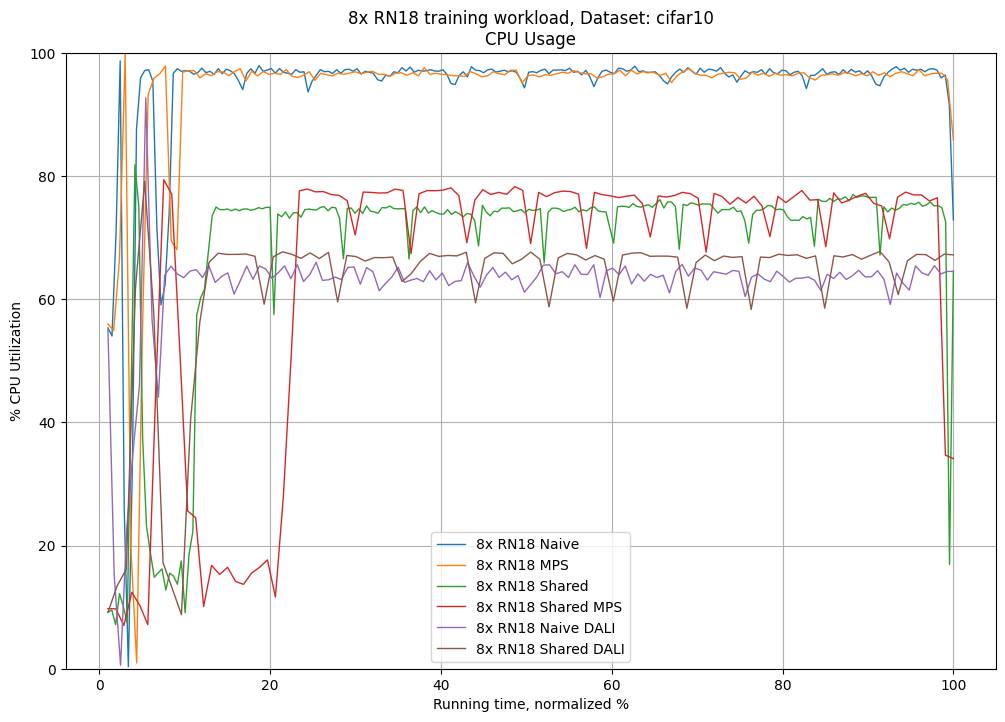

In [13]:
idx = [i for i in range(0,41,8)]
idx = [i+7 for i in idx]

paths = [
    train_path / model_name / f"pid_{trace_pids[idx[0]]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[idx[1]]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[idx[2]]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[idx[3]]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[idx[4]]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[idx[5]]}_cpu.out"
]

logs = [
    train_path / model_name / f"{naive_model_path_prefix}_{pids[idx[0]]}.csv",
    train_path / model_name / f"{naive_model_path_prefix}_{pids[idx[1]]}.csv",
    train_mul_path / f"{shared_model_path_prefix}_{pids[idx[2]]}.csv",
    train_mul_path / f"{shared_model_path_prefix}_{pids[idx[3]]}.csv",
    train_path / model_name / f"{naive_model_path_prefix}_{pids[idx[4]]}.csv",
    train_mul_path / f"{shared_model_path_prefix}_{pids[idx[5]]}.csv",
]

suptitles = [
    "8x RN18 Naive",
    "8x RN18 MPS",
    "8x RN18 Shared",
    "8x RN18 Shared MPS",
    "8x RN18 Naive DALI",
    "8x RN18 Shared DALI",
]
title = f"8x RN18 training workload, Dataset: {DATASET}"

dfs = [create_plottable_df(path, logs[idx]) for idx, path in enumerate(paths)]

#plot_dfs(dfs, title, suptitles, "%iowait")
plot_dfs(dfs, title, suptitles, "%usr", True)

In [14]:
idx = [i for i in range(0,41,8)]
idx = [i+7 for i in idx]

paths = [
    train_path / model_name / f"pid_{trace_pids[idx[0]]}_dcgm.out",
    train_path / model_name / f"pid_{trace_pids[idx[1]]}_dcgm.out",
    train_mul_path / f"pid_{trace_pids[idx[2]]}_dcgm.out",
    train_mul_path / f"pid_{trace_pids[idx[3]]}_dcgm.out",
    train_path / model_name / f"pid_{trace_pids[idx[4]]}_dcgm.out",
    train_mul_path / f"pid_{trace_pids[idx[5]]}_dcgm.out"
]

logs = [
    train_path / model_name / f"{naive_model_path_prefix}_{pids[idx[0]]}.csv",
    train_path / model_name / f"{naive_model_path_prefix}_{pids[idx[1]]}.csv",
    train_mul_path / f"{shared_model_path_prefix}_{pids[idx[2]]}.csv",
    train_mul_path / f"{shared_model_path_prefix}_{pids[idx[3]]}.csv",
    train_path / model_name / f"{naive_model_path_prefix}_{pids[idx[4]]}.csv",
    train_mul_path / f"{shared_model_path_prefix}_{pids[idx[5]]}.csv",
]

In [15]:
cols = ["running_seconds", "txtpt", "rxtpt", "gputl", "mcutl", "musam", "gusam", "smact", "smocc", "tenso", "drama", "pcitx", "pcirx"]

def get_feat_mean(path, feat="smact"):
    with open(path) as f:
        next(f)
        next(f)
        lines = f.readlines()
        lines = [l for l in lines if l != "\n"]
        lines = [l.strip() for l in lines if not (("#Entity" in l) or ("ID" in l))]
        lines = [l.split()[2:] for l in lines]
        lines = [[i+1] + l for i,l in enumerate(lines)]

    df = pd.DataFrame(lines, columns=cols)
    df[feat] = df[feat].astype(float)
    df = df[df[feat] != 0.0]
    return df[feat].mean()

In [26]:
feat = "smact"

if DATASET == "cifar10":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18", "5x RN18", "6x RN18", "7x RN18", "8x RN18")

    naive = [get_feat_mean(train_path / model_name / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(0, 8)]
    naive_smocc = [get_feat_mean(train_path / model_name / f"pid_{trace_pids[i]}_dcgm.out", "smocc") for i in range(0, 8)]

    mps = [get_feat_mean(train_path / model_name / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(8, 16)]

    shared = [get_feat_mean(train_mul_path / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(16, 24)]

    shared_mps = [get_feat_mean(train_mul_path / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(24, 32)]

    naive_dali = [get_feat_mean(train_path / model_name / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(32, 40)]

    shared_dali = [get_feat_mean(train_mul_path / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(40, 48)]
if DATASET == "imagenet_10pct":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18")

    naive = [get_feat_mean(train_path / model_name / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(0, 4)]

    mps = [get_feat_mean(train_path / model_name / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(4, 8)]

    shared = [get_feat_mean(train_mul_path / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(8, 12)]

    shared_mps = [get_feat_mean(train_mul_path / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(12, 16)]

    naive_dali = [get_feat_mean(train_path / model_name / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(16, 20)]

    shared_dali = [get_feat_mean(train_mul_path / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(20, 24)]

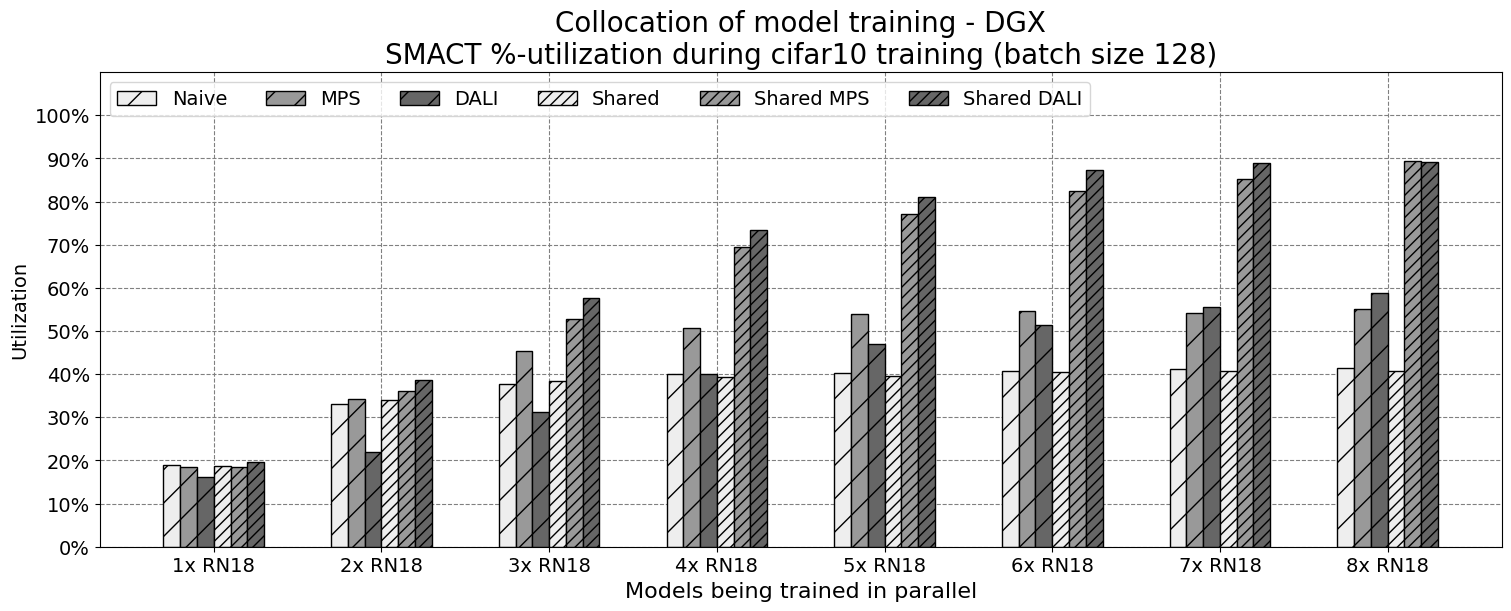

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

measurements ={
    "Naive": naive,
    "MPS": mps,
    "DALI": naive_dali,
    "Shared": shared,
    "Shared MPS": shared_mps,
    "Shared DALI": shared_dali,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,6))
hatches = ["/", "/", "/", "///", "///", "///"]
hatch_cols = ["#eeeeee", "#999999", "#666666", 
              "#eeeeee", "#999999", "#666666"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    #ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Utilization', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\n{feat.upper()} %-utilization during {DATASET} training (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14, ncols=6)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i/10 for i in range(0, 11)], fontsize=14)
fmt = lambda x, pos: '{:.0f}%'.format(x*100)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
plt.ylim(0,1.1)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [45]:
def plot_dfs(measurements, title, titles):
    xs = []
    ys = []
    fig, ax = plt.subplots(figsize=(8,4))
    width = 0.25  # the width of the bars
    multiplier = -0.5
    xs = np.arange(len(titles))
    ys = measurements
    colors = ["#666666", "#999999"]

    for idx, (attribute, measurement) in enumerate(measurements.items()):
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[idx])
        #ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
        multiplier += 1

    #ax.bar(xs, ys, width, color="#666666")
    ax.set_xticks(xs, titles, fontsize=10, rotation=45, ha="right")
    #ax.set_xticks(xs + width, workloads, fontsize=14)

    plt.ylabel('% Utilization')
    plt.title(f'{title}\nGPU utilization (SMACT and SMOCC)')

    ax.set_axisbelow(True)
    ax.grid(color='gray', linestyle='dashed')
    plt.legend()
    plt.ylim(0,100)
    plt.show()

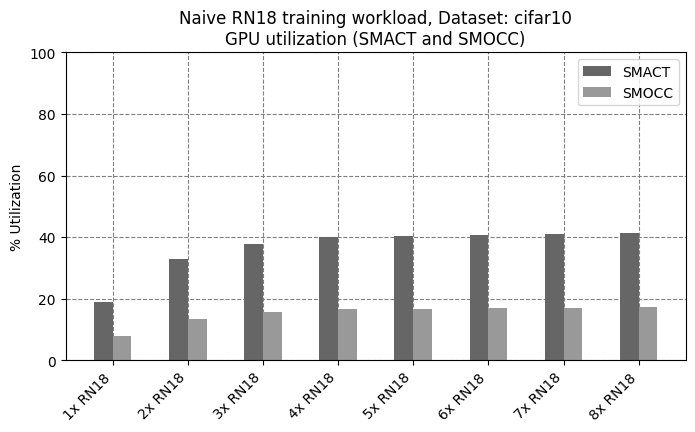

In [46]:
measurements = {
    "SMACT": [i*100 for i in naive],
    "SMOCC": [i*100 for i in naive_smocc]
}

plot_dfs(measurements, f"Naive RN18 training workload, Dataset: {DATASET}", [f"{i}x RN18" for i in range(1,9)])

In [146]:
cols = ["running_seconds", "txtpt", "rxtpt", "gputl", "mcutl", "musam", "gusam", "smact", "smocc", "tenso", "drama", "pcitx", "pcirx"]

def get_feat_mean(path, feat="smact"):
    with open(path) as f:
        next(f)
        next(f)
        lines = f.readlines()
        lines = [l for l in lines if l != "\n"]
        lines = [l.strip() for l in lines if not (("#Entity" in l) or ("ID" in l))]
        lines = [l.split()[2:] for l in lines]
        lines = [[i+1] + l for i,l in enumerate(lines)]

    df = pd.DataFrame(lines, columns=cols)
    df[feat] = df[feat].astype(float)
    df = df[df[feat] != 0.0]
    return df[feat].mean()

In [172]:
trace_header = ["date", "time", "gpu", "pid", "type", "sm", "mem", "enc", "dec", "mb", "command"]

def get_sm_mean(path, mps=False):
    workload_type = ""

    with open(path, "r") as f:
        next(f)
        next(f)
        lines = f.readlines()
        lines = [line.strip().split() for line in lines]

    clean_lines = []

    for l in lines:
        if l == ['#Date', 'Time', 'gpu', 'pid', 'type', 'sm', 'mem', 'enc', 'dec', 'fb', 'command']:
            continue
        elif l == ['#YYYYMMDD', 'HH:MM:SS', 'Idx', '#', 'C/G', '%', '%', '%', '%', 'MB', 'name']:
            continue
        elif l[-1] != "nvidia-cuda-mps" and "mps" in workload_type:
            continue
        elif int(l[2]) != 2:
            continue
        elif l[3] == "-":
            continue
        else:
            clean_lines.append(l)

    df = pd.DataFrame(clean_lines, columns=trace_header)

    df["sm"] = df["sm"].replace({"-": 0})
    df["mem"] = df["mem"].replace({"-": 0})

    df['sm'] = df['sm'].astype(int)
    df['mem'] = df['mem'].astype(int)
    if mps:
        df = df[df["command"] == "nvidia-cuda-mps"]
    df = df[df["sm"] > 0]

    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
    #return df
    return df.groupby("time")["sm"].sum().mean()

In [174]:
if DATASET == "cifar10":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18", "5x RN18", "6x RN18", "7x RN18", "8x RN18")

    naive = [get_sm_mean(train_path / model_name / f"pid_{trace_pids[i]}_gpu.out") for i in range(0, 8)]

    mps = [get_sm_mean(train_path / model_name / f"pid_{trace_pids[i]}_gpu.out", mps=True) for i in range(8, 16)]

    shared = [get_sm_mean(train_mul_path / f"pid_{trace_pids[i]}_gpu.out") for i in range(16, 24)]

    shared_mps = [get_sm_mean(train_mul_path / f"pid_{trace_pids[i]}_gpu.out", mps=True) for i in range(24, 32)]

    naive_dali = [get_sm_mean(train_path / model_name / f"pid_{trace_pids[i]}_gpu.out") for i in range(32, 40)]

    shared_dali = [get_sm_mean(train_mul_path / f"pid_{trace_pids[i]}_gpu.out") for i in range(40, 48)]
if DATASET == "imagenet_10pct":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18")

    naive = [get_sm_mean(train_path / model_name / f"pid_{trace_pids[i]}_gpu.out") for i in range(0, 4)]

    mps = [get_sm_mean(train_path / model_name / f"pid_{trace_pids[i]}_gpu.out", mps=True) for i in range(4, 8)]

    shared = [get_sm_mean(train_mul_path / f"pid_{trace_pids[i]}_gpu.out") for i in range(8, 12)]

    shared_mps = [get_sm_mean(train_mul_path / f"pid_{trace_pids[i]}_gpu.out", mps=True) for i in range(12, 16)]

    naive_dali = [get_sm_mean(train_path / model_name / f"pid_{trace_pids[i]}_gpu.out") for i in range(16, 20)]

    shared_dali = [get_sm_mean(train_mul_path / f"pid_{trace_pids[i]}_gpu.out") for i in range(20, 24)]

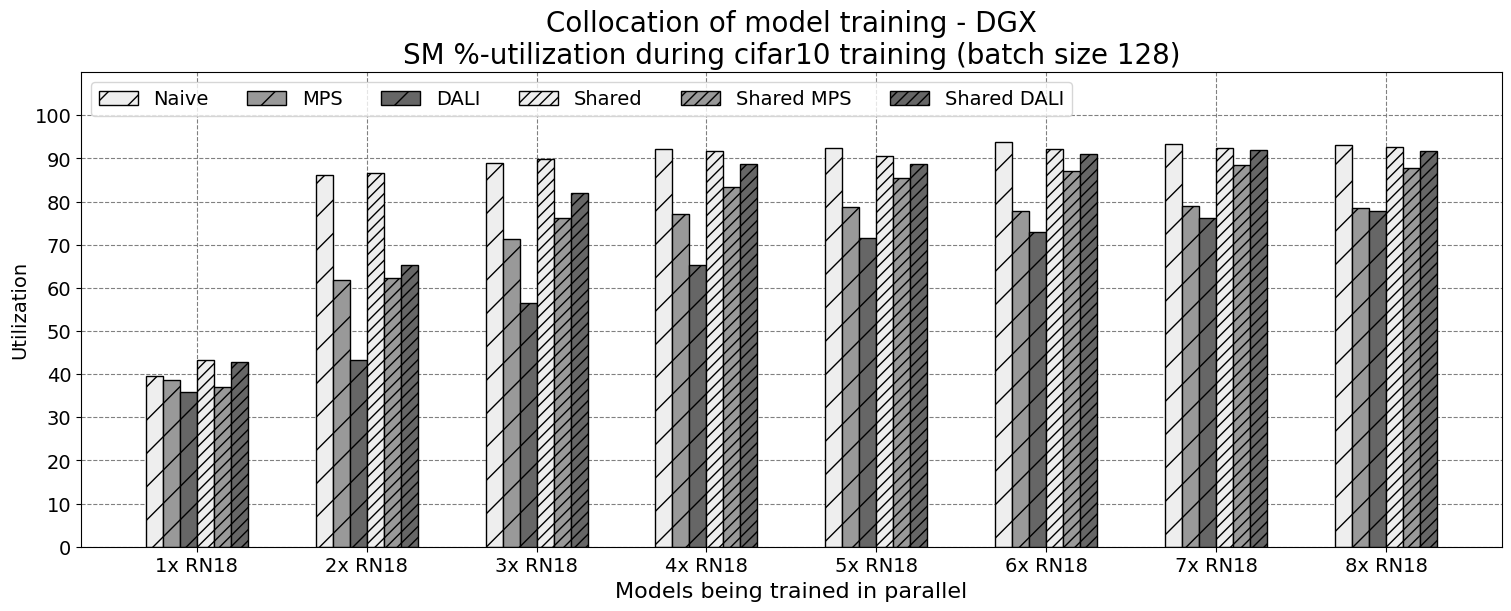

In [175]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

measurements ={
    "Naive": naive,
    "MPS": mps,
    "DALI": naive_dali,
    "Shared": shared,
    "Shared MPS": shared_mps,
    "Shared DALI": shared_dali,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,6))
hatches = ["/", "/", "/", "///", "///", "///"]
hatch_cols = ["#eeeeee", "#999999", "#666666", 
              "#eeeeee", "#999999", "#666666"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    #ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Utilization', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nSM %-utilization during {DATASET} training (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14, ncols=6)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 101, 10)], fontsize=14)
#fmt = lambda x, pos: '{:.0f}%'.format(x*100)
#ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
plt.ylim(0, 110)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [37]:
cols = ["time", "cpu", "%usr", "%nice", "%sys", "%iowait", "%irq", "%soft", "%steal", "%guest", "%gnice", "%idle"]

def create_plottable_df(path):
    with open(path) as f:
        lines = f.readlines()
        lines = [l for l in lines if l != "\n"]
        lines = [l.strip() for l in lines if not "CPU" in l]
        lines = [l.split() for l in lines]

    new_lines = []

    for line in lines:
        new_line = []
        for idx, l in enumerate(line):
            if idx == 0:
                new_line.append(l)
            else:
                new_line.append(float(l))
        new_lines.append(new_line)
    df = pd.DataFrame(new_lines, columns=cols)
    df['running_seconds'] = pd.to_datetime(df['time'], unit='ns')
    first_timestamp = df['running_seconds'].iloc[0]
    df['running_seconds'] = (df['running_seconds'] - first_timestamp).dt.total_seconds()
    df['running_seconds_normalized'] = (df['running_seconds'] - df['running_seconds'].min()) / (df['running_seconds'].max() - df['running_seconds'].min()) * 99 + 1
    
    return df

In [38]:
def plot_dfs(dfs, title, titles, metric, normalized=True):
    fig, ax = plt.subplots(figsize=(12,8))
    if normalized:
        group = 'running_seconds_normalized'
    else:
        group = 'running_seconds'
    for idx, df in enumerate(dfs):
        average_all_cpus = df.groupby(group)[metric].mean()

        plt.plot(average_all_cpus.index, average_all_cpus.values, \
                    linewidth=1, label=titles[idx])

    plt.xlabel('Running time, normalized %')
    if metric in ["%usr", "%nice"]:
        plt.ylabel('% CPU Utilization')
        plt.title(f'{title}\nCPU Usage')
    if metric == "%iowait":
        plt.ylabel('% I/O wait')
        plt.title(f'{title}\nI/O wait')
    plt.legend()
    plt.grid(True)
    plt.ylim(0,100)
    plt.show()

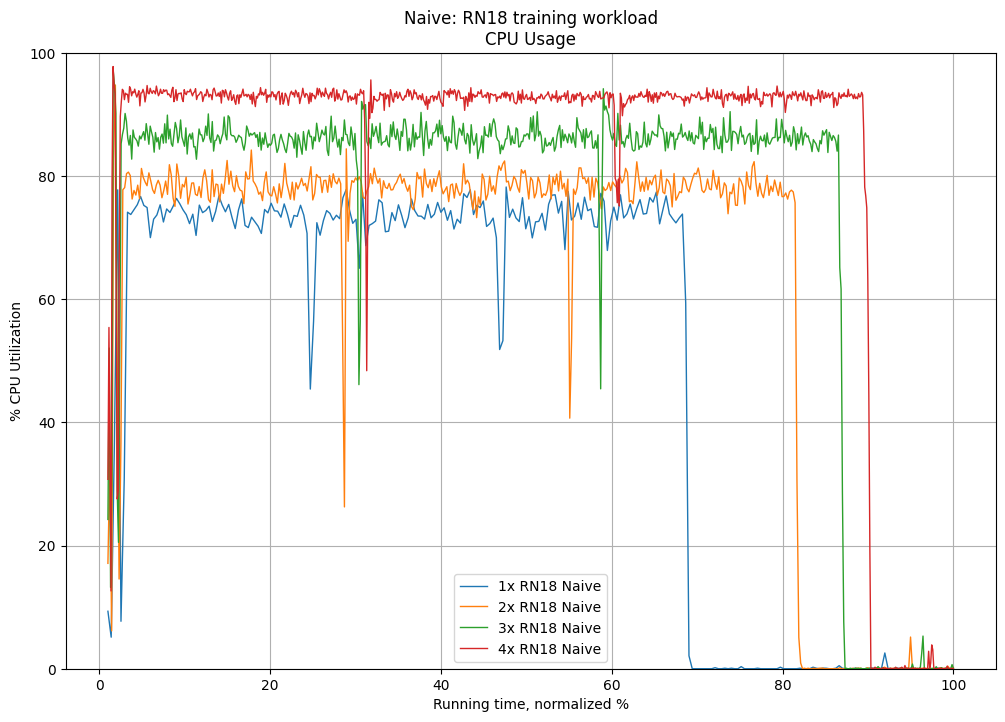

In [48]:
paths = [
    train_path / model_name / f"pid_{trace_pids[0]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[1]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[2]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[3]}_cpu.out",
]
suptitles = [
    "1x RN18 Naive",
    "2x RN18 Naive",
    "3x RN18 Naive",
    "4x RN18 Naive",
]
title = "Naive: RN18 training workload"

dfs = [create_plottable_df(path) for path in paths]

#plot_dfs(dfs, title, suptitles, "%iowait")
plot_dfs(dfs, title, suptitles, "%usr", normalized=True)

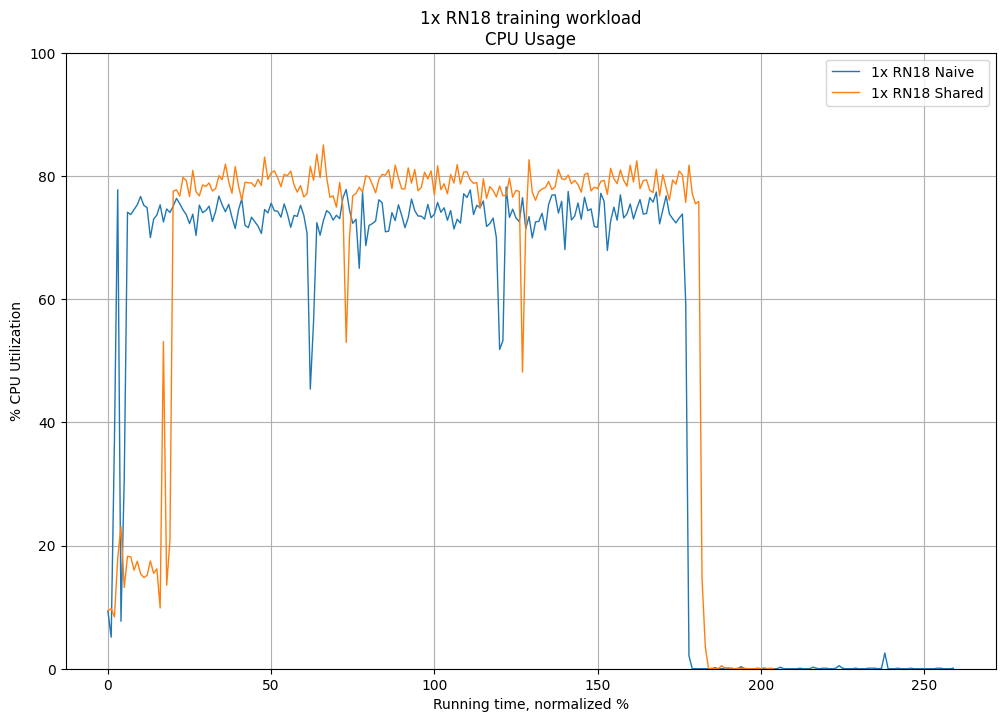

In [44]:
paths = [
    train_path / model_name / f"pid_{trace_pids[0]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[4]}_cpu.out",
]
suptitles = [
    "1x RN18 Naive",
    "1x RN18 Shared",
]
title = "1x RN18 training workload"

dfs = [create_plottable_df(path) for path in paths]

#plot_dfs(dfs, title, suptitles, "%iowait")
plot_dfs(dfs, title, suptitles, "%usr", normalized=False)

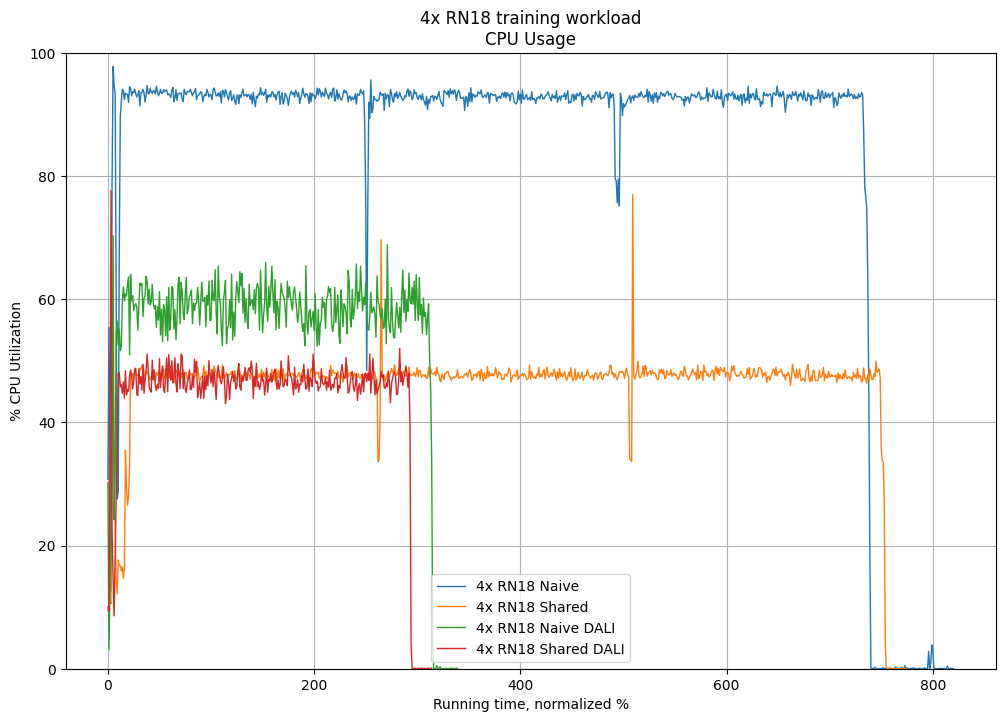

In [46]:
paths = [
    train_path / model_name / f"pid_{trace_pids[3]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[7]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[11]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[15]}_cpu.out",
]
suptitles = [
    "4x RN18 Naive",
    "4x RN18 Shared",
    "4x RN18 Naive DALI",
    "4x RN18 Shared DALI",
]
title = "4x RN18 training workload"

dfs = [create_plottable_df(path) for path in paths]

#plot_dfs(dfs, title, suptitles, "%iowait")
plot_dfs(dfs, title, suptitles, "%usr", normalized=False)

In [ ]:
def create_plotable_df(plot_df, trace_pid, workload_type, ignore_pid=0, add_second=0):
    plot_df['date'] = pd.to_datetime(plot_df['timestamp'], unit="s", utc=True).dt.tz_convert('Europe/Berlin') - pd.DateOffset(hours=2) + pd.DateOffset(seconds=add_second)
    plot_df['time'] = plot_df["date"].dt.time

    start_time = str(plot_df["time"].iloc[0])
    end_time = str(plot_df["time"].iloc[-2])

    trace_header = ["date", "time", "gpu", "pid", "type", "sm", "mem", "enc", "dec", "mb", "command"]
    all_lines = []

    if workload_type in ("naive", "naive_mps"):
        trace_path = train_path / model_name / f"pid_{trace_pid}_gpu.out"
    elif workload_type in ("shared", "shared_mps"):
        trace_path = train_mul_path / f"pid_{trace_pid}_gpu.out"
    
    with open(trace_path, "r") as f:
        next(f)
        next(f)
        lines = f.readlines()
        lines = [line.strip().split() for line in lines]

    start_idx, end_idx = 0, 0
    while lines[start_idx][1] != start_time:
        start_idx += 1
    while lines[end_idx][1] != end_time:
        end_idx += 1
    all_lines=lines[start_idx:end_idx+1]

    clean_lines = []

    for l in all_lines:
        if l == ['#Date', 'Time', 'gpu', 'pid', 'type', 'sm', 'mem', 'enc', 'dec', 'fb', 'command']:
            continue
        elif l == ['#YYYYMMDD', 'HH:MM:SS', 'Idx', '#', 'C/G', '%', '%', '%', '%', 'MB', 'name']:
            continue
        elif l[-1] != "nvidia-cuda-mps" and "mps" in workload_type:
            continue
        elif int(l[2]) != 0:
            continue
        elif ignore_pid == int(l[3]):
            continue
        else:
            clean_lines.append(l)

    df = pd.DataFrame(clean_lines, columns=trace_header)

    df["sm"] = df["sm"].replace({"-": 0})
    df["mem"] = df["mem"].replace({"-": 0})

    df['sm'] = df['sm'].astype(int)
    df['mem'] = df['mem'].astype(int)

    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
    df['time_diff'] = (df['datetime'] - df['datetime'][0]).dt.total_seconds()

    return df

In [ ]:
def plot_heatmap(df, value="sm", title=""):
    max_val = df.iloc[-1]["time_diff"]

    plt.figure(figsize=(15,12))
    heatmap_data = df.pivot_table(index='time_diff', columns='pid', values=value)

    # Create a heatmap plot using seaborn
    ax = sns.heatmap(heatmap_data, cmap='gray_r', vmax=100,
                    yticklabels=[i if i % 25 == 0 else None for i in range(0, int(max_val))])
    ax.set_axisbelow(True)
    ax.grid(color='gray', linestyle='dashed')
    # Add labels and title to the plot
    plt.xlabel('PID')
    plt.ylabel('Time (seconds)')
    #ax.set_yticks([float(i) for i in range(0, 251, 25)])
    ax.set_title(title + f"\n{value.upper()} %-utilization for each process over time", size=12)

    # Show the plot
    plt.show()

In [ ]:
def plot_timeseries(df, value, title):
    fig, ax = plt.subplots(figsize=(12,8))

    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
    df['time_diff'] = (df['datetime'] - df['datetime'][0]).dt.total_seconds()

    groups = df.groupby('pid')

    for pid, group in groups:
        l1 = f'PID {pid} {value.upper()} %'
        h1 = group.plot(kind='line', x='time_diff', y=value, ax=ax, label=l1)
        #ax.get_legend().remove()

        l2 = 'PID {} MEM %'.format(pid)
        h2 = group.plot(kind='line', x='time_diff', y='mem', ax=ax, color='r', label=l2)
        #ax2.get_legend().remove()

    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Utilization %')
    ax.set_title(title, fontsize=12)
    plt.yticks([i for i in range(0, 101, 20)], fontsize=7)

    ax.set_axisbelow(True)
    ax.grid(color='gray', linestyle='dashed')
    plt.show()

In [ ]:
titles = [
    "Naive, 1x RN18, BS 128, g5.xlarge",
    "MPS, 1x RN18, BS 128, g5.xlarge",
    "Shared, 1x RN18, BS 128, g5.xlarge",
    "Shared + MPS, 1x RN18, 128, g5.xlarge"
]
ignore_pids = [0, 0, 46779, 0]
add_seconds = [0, 0, 0, 0]
workload_types = ["naive", "naive_mps", "shared", "shared_mps"]
trace_pids_1x = [trace_pids[0], trace_pids[4], trace_pids[8], trace_pids[12]]
for idx, df in enumerate([df_1x, df_1x_mps, df_mul_1x, df_mul_1x_mps]):

    plot_df = create_plotable_df(df, trace_pids_1x[idx], workload_types[idx], ignore_pid=ignore_pids[idx], add_second=add_seconds[idx])
    plot_timeseries(plot_df, "sm", titles[idx])

    #plot_heatmap(plot_df, "sm")
    #plot_heatmap(plot_df, "mem")
    

In [ ]:
titles = [
    "Naive, 2x RN18, BS 128, g5.xlarge",
    "MPS, 2x RN18, BS 128, g5.xlarge",
    "Shared, 2x RN18, BS 128, g5.xlarge",
    "Shared + MPS, 2x RN18, BS 128, g5.xlarge"
]
ignore_pids = [0, 0, 47048, 0]
add_seconds = [0, 0, 0, 0]
workload_types = ["naive", "naive_mps", "shared", "shared_mps"]
trace_pids_2x = [trace_pids[1], trace_pids[5], trace_pids[9], trace_pids[13]]
for idx, df in enumerate([df_2x, df_2x_mps, df_mul_2x, df_mul_2x_mps]):

    plot_df = create_plotable_df(df, trace_pids_2x[idx], workload_types[idx], ignore_pid=ignore_pids[idx], add_second=add_seconds[idx])
    plot_timeseries(plot_df, "sm", titles[idx])

    plot_heatmap(plot_df, "sm", titles[idx])
    plot_heatmap(plot_df, "mem", titles[idx])
    